In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment


In [2]:
data=pd.read_csv(r"C:\Users\jbnay\Downloads\titanic_dataset  (1).csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Do all the necessary pre-processing steps

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Handling Missing Value

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [10]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [12]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Handling Outliers

In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

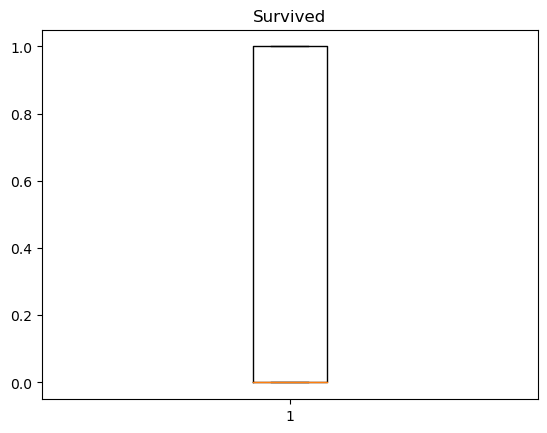

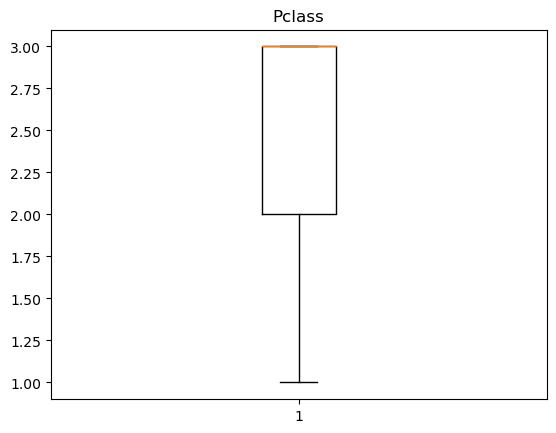

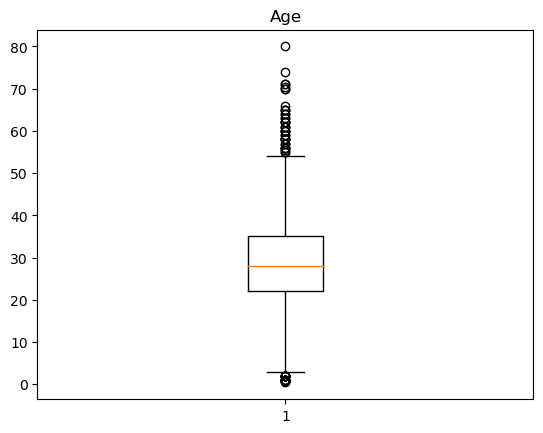

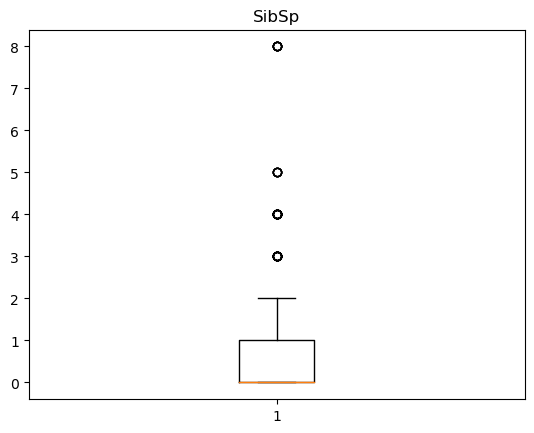

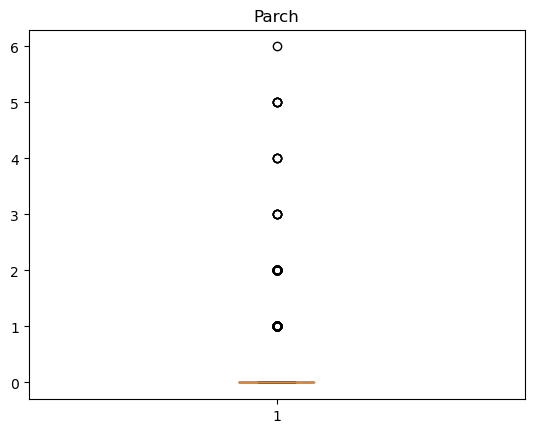

In [14]:
num_cols = ['Survived', 'Pclass','Age', 'SibSp','Parch']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [15]:
Q1 = data['Survived'].quantile(0.25)
Q2 = data['Survived'].quantile(0.50)
Q3 = data['Survived'].quantile(0.75)
print('Q1 :',Q1)
print('Q2 :',Q2) # q2 is median.
print('Q3: ',Q3)

IQR = Q3 - Q1
UL = Q4 = Q3 + (1.5 * IQR)
LL = Q0 = Q1 - (1.5 * IQR)
print("Upper Limit", UL)
print("Lower Limit", LL)

outliers = []
for value in data['Survived']:
    if (value>UL) or (value<LL):
        outliers.append(value)
print(outliers)

Q1 : 0.0
Q2 : 0.0
Q3:  1.0
Upper Limit 2.5
Lower Limit -1.5
[]


In [16]:
data1 = data[(data['Survived']>=LL) & (data['Survived'] <=UL)]
print("Initial rows and coulmns: ",data.shape)
print("After dropping, count of rows and coulmns: ", data1.shape)

Initial rows and coulmns:  (891, 12)
After dropping, count of rows and coulmns:  (891, 12)


In [17]:
Q1 = data['Pclass'].quantile(0.25)
Q2 = data['Pclass'].quantile(0.50)
Q3 = data['Pclass'].quantile(0.75)
print('Q1 :',Q1)
print('Q2 :',Q2) # q2 is median.
print('Q3: ',Q3)

IQR = Q3 - Q1
UL = Q4 = Q3 + (1.5 * IQR)
LL = Q0 = Q1 - (1.5 * IQR)
print("Upper Limit", UL)
print("Lower Limit", LL)

outliers = []
for value in data['Pclass']:
    if (value>UL) or (value<LL):
        outliers.append(value)
print(outliers)

Q1 : 2.0
Q2 : 3.0
Q3:  3.0
Upper Limit 4.5
Lower Limit 0.5
[]


In [18]:
data1 = data[(data['Pclass']>=LL) & (data['Pclass'] <=UL)]
print("Initial rows and coulmns: ",data.shape)
print("After dropping, count of rows and coulmns: ", data1.shape)

Initial rows and coulmns:  (891, 12)
After dropping, count of rows and coulmns:  (891, 12)


In [19]:
Q1 = data['Age'].quantile(0.25)
Q2 = data['Age'].quantile(0.50)
Q3 = data['Age'].quantile(0.75)
print('Q1 :',Q1)
print('Q2 :',Q2) # q2 is median.
print('Q3: ',Q3)

IQR = Q3 - Q1
UL = Q4 = Q3 + (1.5 * IQR)
LL = Q0 = Q1 - (1.5 * IQR)
print("Upper Limit", UL)
print("Lower Limit", LL)

outliers = []
for value in data['Age']:
    if (value>UL) or (value<LL):
        outliers.append(value)
print(outliers)

Q1 : 22.0
Q2 : 28.0
Q3:  35.0
Upper Limit 54.5
Lower Limit 2.5
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [20]:
data1 = data[(data['Age']>=LL) & (data['Age'] <=UL)]
print("Initial rows and coulmns: ",data.shape)
print("After dropping, count of rows and coulmns: ", data1.shape)

Initial rows and coulmns:  (891, 12)
After dropping, count of rows and coulmns:  (825, 12)


In [21]:
Q1 = data['SibSp'].quantile(0.25)
Q2 = data['SibSp'].quantile(0.50)
Q3 = data['SibSp'].quantile(0.75)
print('Q1 :',Q1)
print('Q2 :',Q2) # q2 is median.
print('Q3: ',Q3)

IQR = Q3 - Q1
UL = Q4 = Q3 + (1.5 * IQR)
LL = Q0 = Q1 - (1.5 * IQR)
print("Upper Limit", UL)
print("Lower Limit", LL)

outliers = []
for value in data['SibSp']:
    if (value>UL) or (value<LL):
        outliers.append(value)
print(outliers)

Q1 : 0.0
Q2 : 0.0
Q3:  1.0
Upper Limit 2.5
Lower Limit -1.5
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [22]:
data1 = data[(data['SibSp']>=LL) & (data['SibSp'] <=UL)]
print("Initial rows and coulmns: ",data.shape)
print("After dropping, count of rows and coulmns: ", data1.shape)

Initial rows and coulmns:  (891, 12)
After dropping, count of rows and coulmns:  (845, 12)


In [23]:
Q1 = data['Parch'].quantile(0.25)
Q2 = data['Parch'].quantile(0.50)
Q3 = data['Parch'].quantile(0.75)
print('Q1 :',Q1)
print('Q2 :',Q2) # q2 is median.
print('Q3: ',Q3)

IQR = Q3 - Q1
UL = Q4 = Q3 + (1.5 * IQR)
LL = Q0 = Q1 - (1.5 * IQR)
print("Upper Limit", UL)
print("Lower Limit", LL)

outliers = []
for value in data['Parch']:
    if (value>UL) or (value<LL):
        outliers.append(value)
print(outliers)

Q1 : 0.0
Q2 : 0.0
Q3:  0.0
Upper Limit 0.0
Lower Limit 0.0
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5, 2]


In [24]:
data1 = data[(data['Parch']>=LL) & (data['Parch'] <=UL)]
print("Initial rows and coulmns: ",data.shape)
print("After dropping, count of rows and coulmns: ", data1.shape)

Initial rows and coulmns:  (891, 12)
After dropping, count of rows and coulmns:  (678, 12)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [26]:
data['Survived'] = le.fit_transform(data['Survived'])

In [27]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.0,678.000000
mean,445.255162,0.343658,2.321534,31.210914,0.237463,0.0,25.586774
std,256.163557,0.475279,0.836665,11.157185,0.496321,0.0,41.878786
min,1.000000,0.000000,1.000000,5.000000,0.000000,0.0,0.000000
25%,224.250000,0.000000,2.000000,25.000000,0.000000,0.0,7.854200
50%,452.500000,0.000000,3.000000,28.000000,0.000000,0.0,10.500000
75%,665.750000,1.000000,3.000000,35.000000,0.000000,0.0,26.000000
max,891.000000,1.000000,3.000000,80.000000,3.000000,0.0,512.329200


In [30]:
data2 = data1.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [31]:
data2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
data2 = scaler.fit_transform(data2)

In [33]:
type(data2)

numpy.ndarray

In [34]:
data2 = pd.DataFrame(data2, columns=['PassengerId','Survived' ,'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [35]:
type(data2)

pandas.core.frame.DataFrame

In [36]:
data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.0,678.000000
mean,0.499163,0.343658,0.660767,0.349479,0.079154,0.0,0.049942
std,0.287824,0.475279,0.418332,0.148762,0.165440,0.0,0.081742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.250843,0.000000,0.500000,0.266667,0.000000,0.0,0.015330
50%,0.507303,0.000000,1.000000,0.306667,0.000000,0.0,0.020495
75%,0.746910,1.000000,1.000000,0.400000,0.000000,0.0,0.050749
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [38]:
x = data2.drop('Survived',axis=1) # feature or indpendent var
y = data2['Survived'] # target or response or dependent var

In [39]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# 3. Create kNN and SVM models

SVM model

In [40]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train) 

SVC(kernel='linear')

In [41]:
y_pred=svmclf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6838235294117647


In [43]:
print(confusion_matrix(y_test,y_pred)) 

[[71 16]
 [27 22]]


KNN model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(8,25)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=2)
    classifier.fit(x_train, y_train)
    pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test, pred_knn)
    metric.append(acc)

 K value vs Accuracy

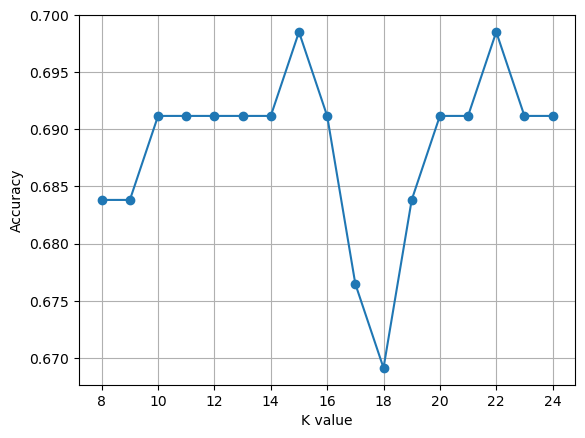

In [45]:
plt.plot(neighbors, metric, 'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [46]:
classifier = KNeighborsClassifier(n_neighbors=12, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)
pred_knn = classifier.predict(x_test)

In [48]:
print('accuracy = ', accuracy_score(y_test, pred_knn))


accuracy =  0.6911764705882353


In [50]:
confusion_matrix(y_test,y_pred)

array([[71, 16],
       [27, 22]], dtype=int64)

# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models.


In [56]:
from sklearn.linear_model import LogisticRegression


In [57]:
lrmodel=LogisticRegression()
lrmodel=lrmodel.fit(x_train,y_train)

In [58]:
score_lr=lrmodel.score(x_test,y_test)

In [59]:
score_lr

0.6691176470588235

In [60]:
y_pred_lr=lrmodel.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
acc=accuracy_score(y_test,y_pred_lr)

In [63]:
acc

0.6691176470588235

KFold cross validation

In [51]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [52]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 31

In [65]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(lrmodel,x,y,cv=kfold_validator)

In [66]:
cv_result

array([0.57352941, 0.64705882, 0.75      , 0.61764706, 0.70588235,
       0.79411765, 0.75      , 0.72058824, 0.79104478, 0.76119403])

In [67]:
np.mean(cv_result)

0.7111062335381914

stratified cross validation technique

In [68]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [69]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 51  57  61  63  64  66  67  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 31

In [70]:
skcv_results=cross_val_score(lrmodel,x,y,cv=skfold_validator)

In [72]:
skcv_results

array([0.67647059, 0.57352941, 0.77941176, 0.69117647, 0.75      ,
       0.72058824, 0.72058824, 0.77941176, 0.76119403, 0.73134328])

In [73]:
np.mean(skcv_results)

0.7183713784021071